In [1]:
import seaborn as sns
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gseapy
from scvi_colab import install
install()
run_outside_colab=True
import scvi
import scipy.sparse
import decoupler as dc
import torch
from gtfparse import read_gtf
from pybiomart import Dataset,Server

/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/scvi_colab/_core.py:41: UserWarning: 
                Not currently in Google Colab environment.

                Please run with `run_outside_colab=True` to override.

                Returning with no further action.
                
  warn(
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readt

In [2]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

[rank: 0] Global seed set to 0


Last run with scvi-tools version: 1.0.4


In [3]:
sc.set_figure_params(figsize=(4, 4), frameon=False)
torch.set_float32_matmul_precision("high")
%config InlineBackend.print_figure_kwargs={"facecolor" : "w"}
%config InlineBackend.figure_format="retina"

In [4]:
adata = sc.read('../../AD_data/SEA_AD/MTG/RNAseq/SEAAD_MTG_RNAseq_final-nuclei.2023-05-05.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 1378211 × 36601
    obs: 'sample_id', 'Neurotypical reference', 'Donor ID', 'Organism', 'Brain Region', 'Sex', 'Gender', 'Age at Death', 'Race (choice=White)', 'Race (choice=Black/ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian/ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)', 'specify other race', 'Hispanic/Latino', 'Highest level of education', 'Years of education', 'PMI', 'Fresh Brain Weight', 'Brain pH', 'Overall AD neuropathological Change', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 'Highest Lewy Body Disease', 'Total Microinfarcts (not observed grossly)', 'Total microinfarcts in screening sections', 'Atherosclerosis', 'Arteriolosclerosis', 'LATE', 'Cognitive Status', 'Last CASI Score', 'Interval from last CASI in months', 'Last MMSE Score', 'Interval from last MMSE in months', 'Last MOCA Score', 'Interval from last MOCA in mo

In [6]:
adata.layers.get('UMIs')

<1378211x36601 sparse matrix of type '<class 'numpy.float32'>'
	with 7621750342 stored elements in Compressed Sparse Row format>

In [7]:
adata.X

<1378211x36601 sparse matrix of type '<class 'numpy.float32'>'
	with 7621750342 stored elements in Compressed Sparse Row format>

In [8]:
adata.obs

,sample_id,Neurotypical reference,Donor ID,Organism,Brain Region,Sex,Gender,Age at Death,Race (choice=White),Race (choice=Black/ African American),...,Fraction mitochondrial UMIs,Used in analysis,Class confidence,Class,Subclass confidence,Subclass,Supertype confidence,Supertype (non-expanded),Supertype,Continuous Pseudo-progression Score
exp_component_name,,,,,,,,,,,,,,,,,,,,,
GGTGATTAGGTCACTT-L8TX_210722_01_H06-1153814299,GGTGATTAGGTCACTT-L8TX_210722_01_H06-1153814299,False,H20.33.034,human,Human MTG,Female,Female,85,Checked,Unchecked,...,0.000454,True,1.0,Non-neuronal and Non-neural,1.0,Oligodendrocyte,1.000000,Oligo_4,Oligo_4,0.368330
TTGAACGCAGGTGTGA-L8TX_210729_01_G12-1153814338,TTGAACGCAGGTGTGA-L8TX_210729_01_G12-1153814338,False,H21.33.035,human,Human MTG,Female,Female,90+,Checked,Unchecked,...,0.000871,True,1.0,Neuronal: Glutamatergic,1.0,L5 IT,1.000000,L5 IT_5,L5 IT_5,0.376970
GGGAGTAAGGCATTTC-L8TX_210107_01_H09-1142430361,GGGAGTAAGGCATTTC-L8TX_210107_01_H09-1142430361,False,H20.33.014,human,Human MTG,Female,Female,82,Checked,Unchecked,...,0.000078,True,1.0,Neuronal: Glutamatergic,1.0,L2/3 IT,0.985886,L2/3 IT_5,L2/3 IT_5,0.678277
ACAGAAAGTATCGTGT-L8TX_210415_01_G01-1153814188,ACAGAAAGTATCGTGT-L8TX_210415_01_G01-1153814188,False,H21.33.015,human,Human MTG,Male,Male,90+,Checked,Unchecked,...,0.002301,True,1.0,Neuronal: Glutamatergic,1.0,L5/6 NP,0.997137,L5/6 NP_6,L5/6 NP_6,0.230781
TTGTTCAAGCGAGAAA-L8TX_210513_01_F11-1153814259,TTGTTCAAGCGAGAAA-L8TX_210513_01_F11-1153814259,False,H20.33.033,human,Human MTG,Male,Male,68,Checked,Unchecked,...,0.002858,True,1.0,Non-neuronal and Non-neural,1.0,Oligodendrocyte,1.000000,Oligo_4,Oligo_4,0.874938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GATGCTATCAAGCTTG-L8TX_210401_01_B09-1153814174,GATGCTATCAAGCTTG-L8TX_210401_01_B09-1153814174,False,H21.33.023,human,Human MTG,Male,Male,90+,Checked,Unchecked,...,0.001536,True,1.0,Neuronal: Glutamatergic,1.0,L2/3 IT,1.000000,L2/3 IT_6,L2/3 IT_6,0.296555
ATGGTTGAGGTCTACT-L8TX_210722_01_D08-1153814330,ATGGTTGAGGTCTACT-L8TX_210722_01_D08-1153814330,False,H21.33.027,human,Human MTG,Male,Male,90+,Checked,Unchecked,...,0.000918,True,1.0,Neuronal: Glutamatergic,1.0,L2/3 IT,0.999616,L2/3 IT_8,L2/3 IT_8,0.687187
GTCGAATCAACAAGTA-L8TX_201016_01_E05-1153814151,GTCGAATCAACAAGTA-L8TX_201016_01_E05-1153814151,False,H20.33.012,human,Human MTG,Female,Female,90+,Checked,Unchecked,...,0.000107,True,1.0,Non-neuronal and Non-neural,1.0,Oligodendrocyte,1.000000,Oligo_2,Oligo_2,0.237010


In [9]:
adata.obs.Subclass.value_counts()

Subclass
L2/3 IT            330085
L4 IT              168860
L5 IT              128090
Oligodendrocyte    111194
Vip                104514
Pvalb               90804
Astrocyte           70009
Sst                 58265
L6 IT               45252
Lamp5               42921
Microglia-PVM       40000
OPC                 32493
L6 IT Car3          26129
Sncg                22168
Lamp5 Lhx6          21443
L5/6 NP             20741
L6 CT               18402
L6b                 16227
Chandelier          10928
Pax6                 9203
VLMC                 4328
L5 ET                2590
Endothelial          2069
Sst Chodl            1496
Name: count, dtype: int64

## Filter genes based on number of cells

In [29]:
sc.pp.filter_genes(adata, min_counts=3,inplace=True)

In [11]:
adata.obs['Age at Death'] = adata.obs['Age at Death'].map(lambda x: x.rstrip('+-').rstrip('aAbBcC'))
adata.obs['Age at Death'] = adata.obs['Age at Death'].astype('float')

In [12]:
pd.unique(adata.obs['Braak'])

['Braak IV', 'Braak V', 'Braak VI', 'Braak II', 'Braak III', 'Reference', 'Braak 0']
Categories (7, object): ['Reference', 'Braak 0', 'Braak II', 'Braak III', 'Braak IV', 'Braak V', 'Braak VI']

In [13]:
pd.unique(adata.obs['Thal'])

['Thal 3', 'Thal 5', 'Thal 2', 'Thal 4', 'Thal 0', 'Reference', 'Thal 1']
Categories (7, object): ['Reference', 'Thal 0', 'Thal 1', 'Thal 2', 'Thal 3', 'Thal 4', 'Thal 5']

In [14]:
pd.unique(adata.obs['CERAD score'])

['Absent', 'Moderate', 'Sparse', 'Frequent', 'Reference']
Categories (5, object): ['Reference', 'Absent', 'Sparse', 'Moderate', 'Frequent']

## Extract controls, AD cell indices in a list as per experiment and relevant pathology scores

In [ ]:
controls,
early_AD,
inter_AD,
advanced_AD
### For example:Advanced AD samples ##############################
advanced_AD = list(np.where(
((adata.obs.Braak=='Braak VI')|(adata.obs.Braak=='Braak V'))
& ((adata.obs.Thal=='Thal 5')|(adata.obs.Thal=='Thal 4'))
&((adata.obs['CERAD score']=='Frequent')|(adata.obs['CERAD score']=='Moderate'))
&(adata.obs['Overall AD neuropathological Change']=='High')
)[0])

## DE analysis with all cells and then with cell type specificity

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11

Epoch 130/300:  43%|█████████████████████████████████████▎                                                | 130/300 [2:34:26<3:21:57, 71.28s/it, v_num=1, train_loss_step=3.75e+3, train_loss_epoch=3.85e+3]
Monitored metric elbo_validation did not improve in the last 20 records. Best score: 3863.684. Signaling Trainer to stop.


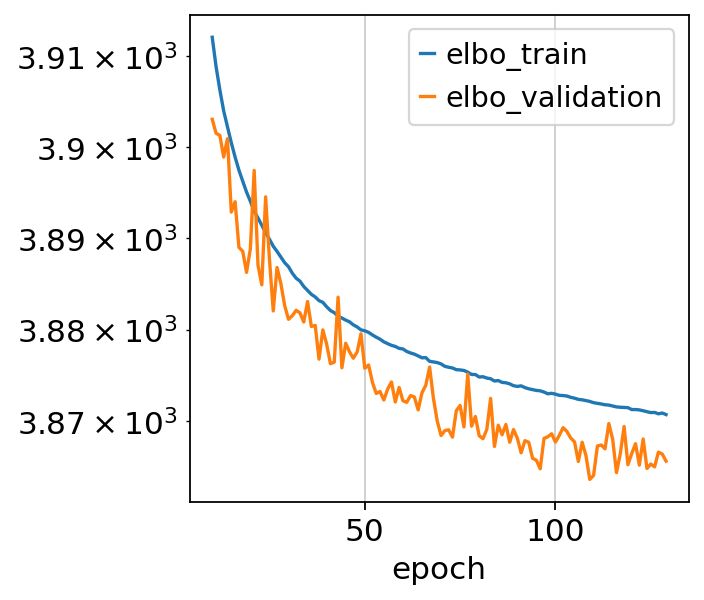

DE...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [03:38<00:00, 218.94s/it]
L6 IT


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1426
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 200/200 [07:49<00:00,  2.36s/it, v_num=1, train_loss_step=1.46e+3, train_loss_epoch=1.46e+3]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 200/200 [07:49<00:00,  2.35s/it, v_num=1, train_loss_step=1.46e+3, train_loss_epoch=1.46e+3]


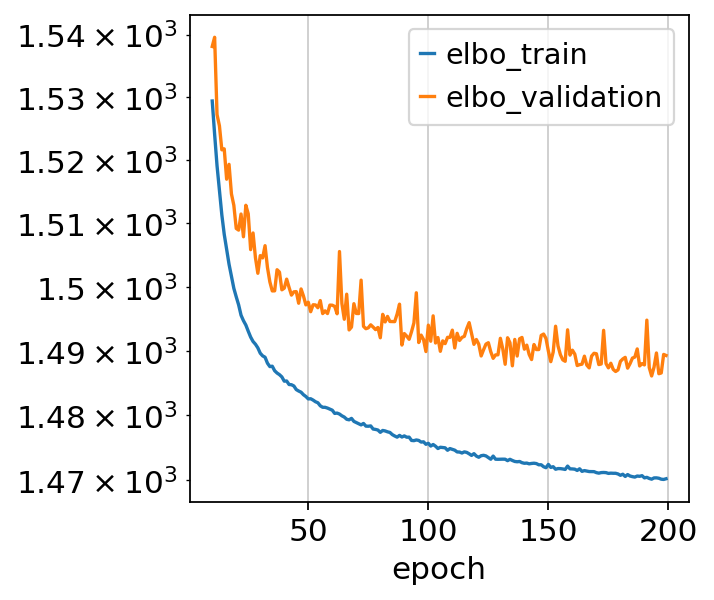

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.90s/it]
VLMC


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1718
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:58<00:00,  3.40it/s, v_num=1, train_loss_step=755, train_loss_epoch=733]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:58<00:00,  3.43it/s, v_num=1, train_loss_step=755, train_loss_epoch=733]


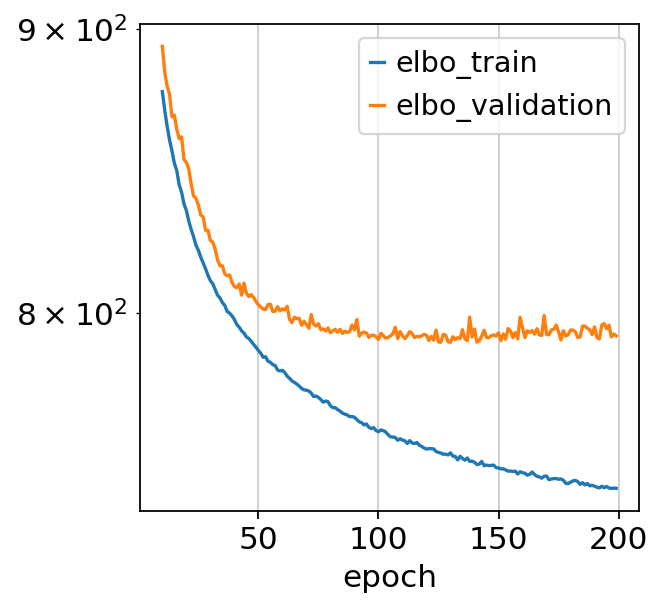

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.02it/s]
L4 IT


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1335
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [29:31<00:00,  8.82s/it, v_num=1, train_loss_step=978, train_loss_epoch=979]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [29:31<00:00,  8.86s/it, v_num=1, train_loss_step=978, train_loss_epoch=979]


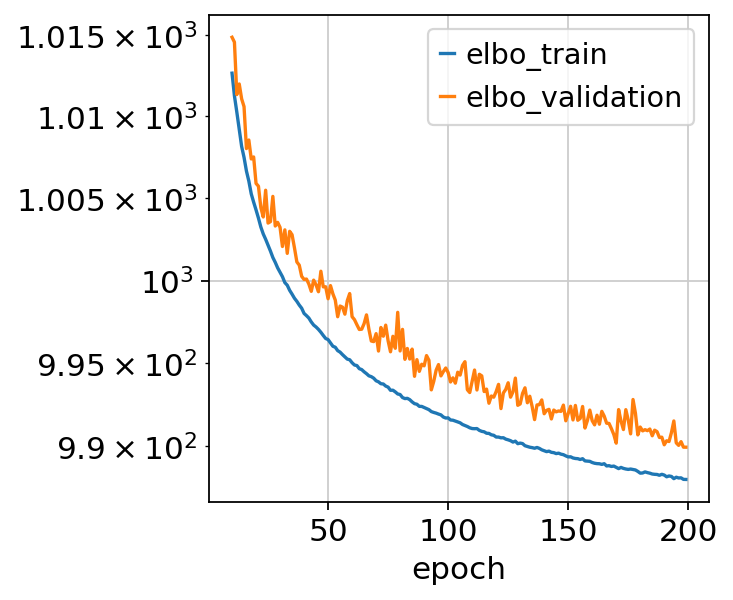

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.96s/it]
L2/3 IT
Variable Genes:1406


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 200/200: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 200/200 [53:57<00:00, 16.14s/it, v_num=1, train_loss_step=1.2e+3, train_loss_epoch=1.21e+3]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 200/200 [53:57<00:00, 16.19s/it, v_num=1, train_loss_step=1.2e+3, train_loss_epoch=1.21e+3]


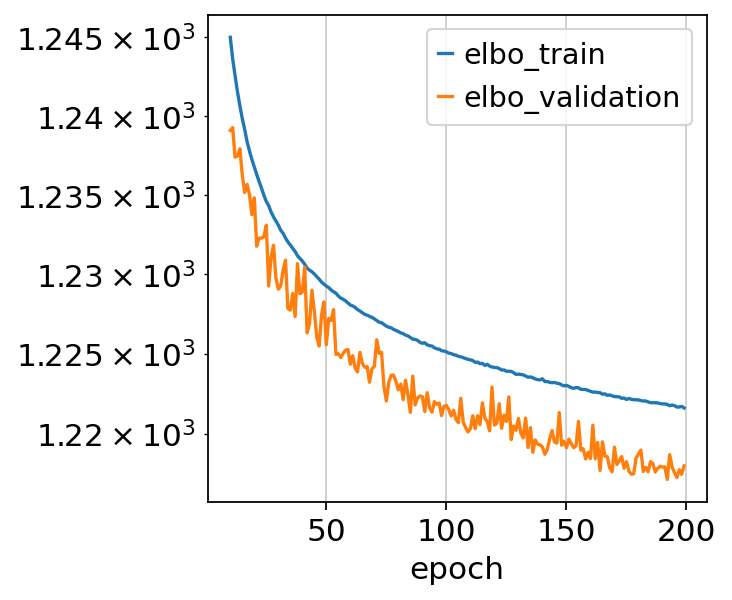

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.31s/it]
Sst


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1305
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [09:17<00:00,  2.80s/it, v_num=1, train_loss_step=637, train_loss_epoch=670]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [09:17<00:00,  2.79s/it, v_num=1, train_loss_step=637, train_loss_epoch=670]


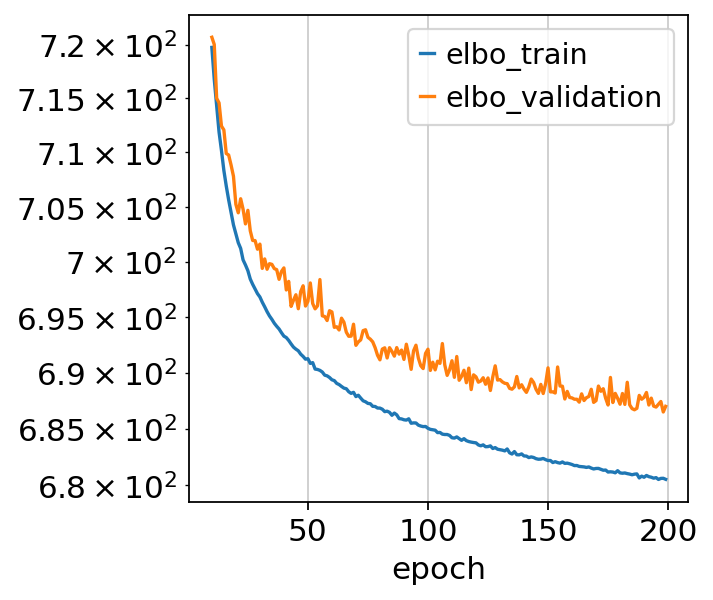

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.76s/it]
L5 IT


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1390
Epoch 200/200: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 200/200 [22:19<00:00,  6.72s/it, v_num=1, train_loss_step=1.3e+3, train_loss_epoch=1.25e+3]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 200/200 [22:19<00:00,  6.70s/it, v_num=1, train_loss_step=1.3e+3, train_loss_epoch=1.25e+3]


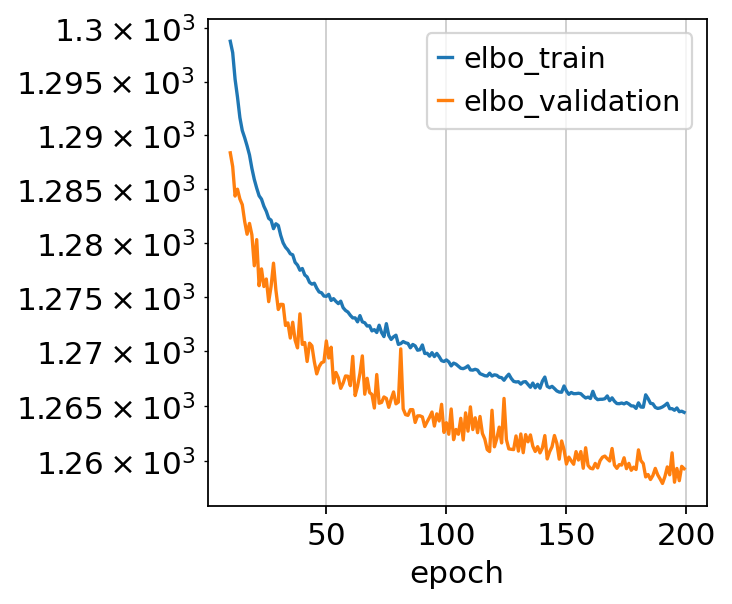

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.22s/it]
Pvalb


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1263
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [15:13<00:00,  4.55s/it, v_num=1, train_loss_step=906, train_loss_epoch=809]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [15:13<00:00,  4.57s/it, v_num=1, train_loss_step=906, train_loss_epoch=809]


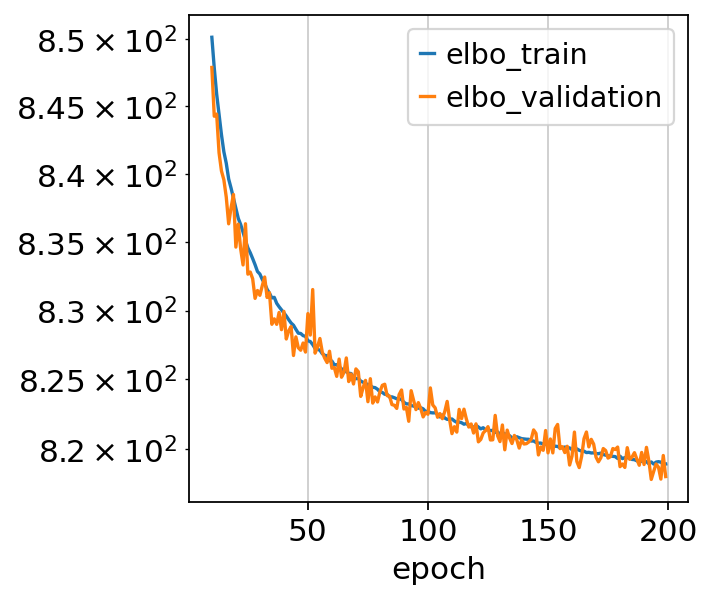

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.60s/it]
OPC


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1639
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [05:29<00:00,  1.62s/it, v_num=1, train_loss_step=939, train_loss_epoch=946]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [05:29<00:00,  1.65s/it, v_num=1, train_loss_step=939, train_loss_epoch=946]


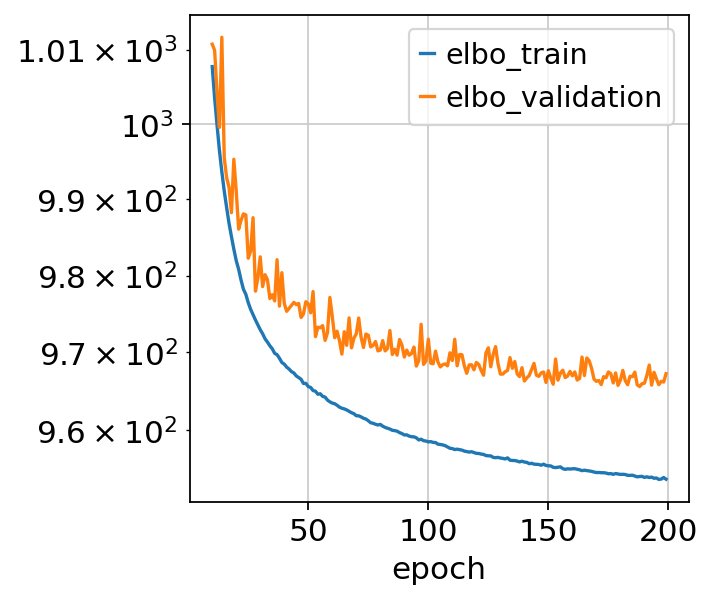

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.53s/it]
Lamp5 Lhx6


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1278
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [03:52<00:00,  1.17s/it, v_num=1, train_loss_step=866, train_loss_epoch=891]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [03:52<00:00,  1.16s/it, v_num=1, train_loss_step=866, train_loss_epoch=891]


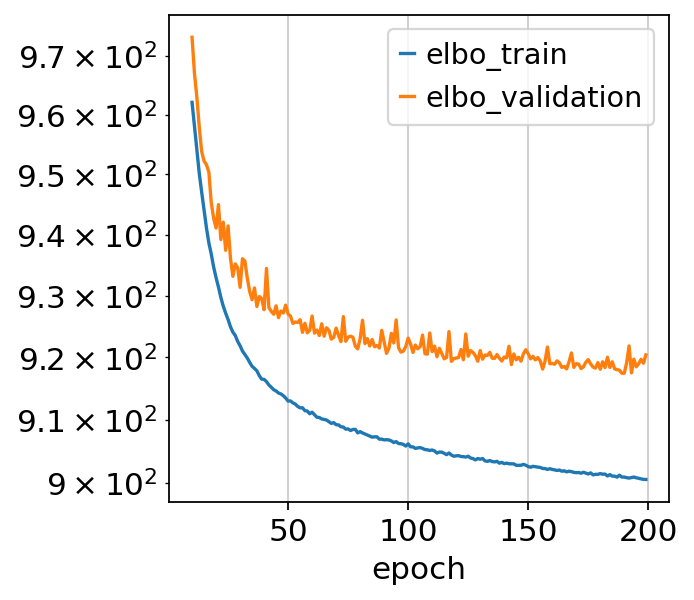

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.08s/it]
Vip


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1391
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [16:56<00:00,  5.09s/it, v_num=1, train_loss_step=908, train_loss_epoch=862]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [16:56<00:00,  5.08s/it, v_num=1, train_loss_step=908, train_loss_epoch=862]


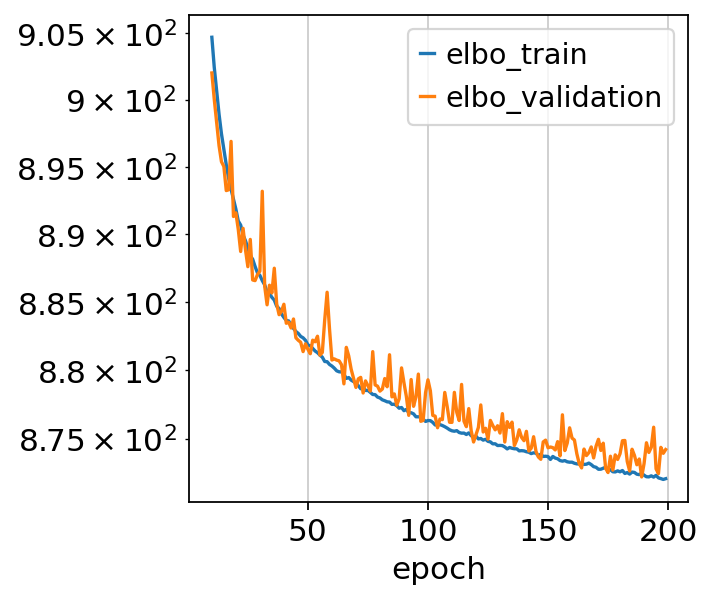

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.03s/it]
Astrocyte


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1498
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [13:15<00:00,  3.97s/it, v_num=1, train_loss_step=886, train_loss_epoch=878]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [13:15<00:00,  3.98s/it, v_num=1, train_loss_step=886, train_loss_epoch=878]


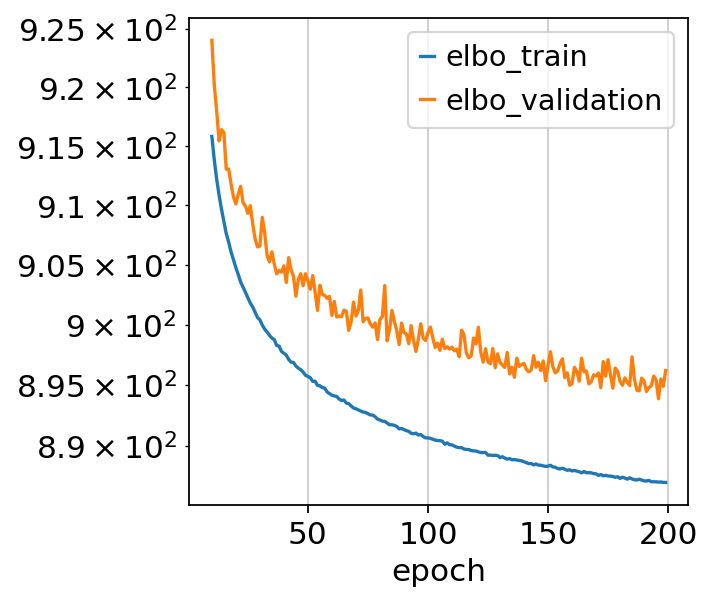

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.54s/it]
Lamp5


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1246
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [07:33<00:00,  2.28s/it, v_num=1, train_loss_step=625, train_loss_epoch=629]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [07:33<00:00,  2.27s/it, v_num=1, train_loss_step=625, train_loss_epoch=629]


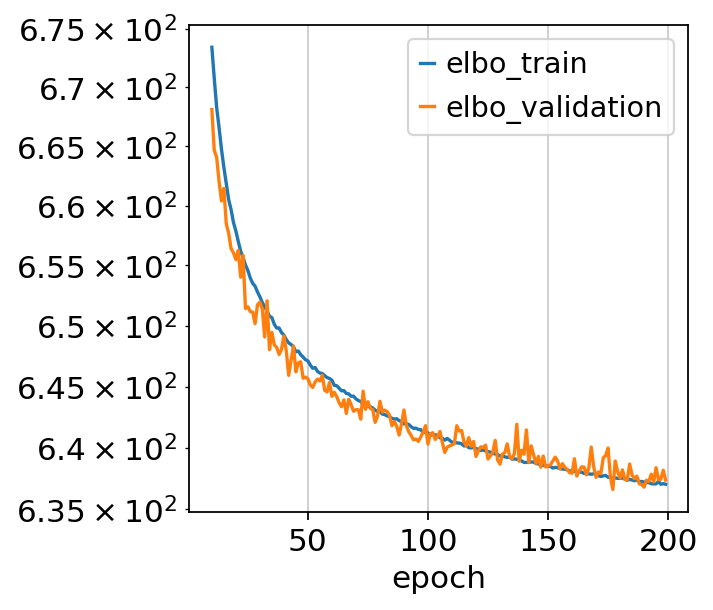

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.47s/it]
Oligodendrocyte


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1608
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [18:55<00:00,  5.72s/it, v_num=1, train_loss_step=777, train_loss_epoch=751]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [18:55<00:00,  5.68s/it, v_num=1, train_loss_step=777, train_loss_epoch=751]


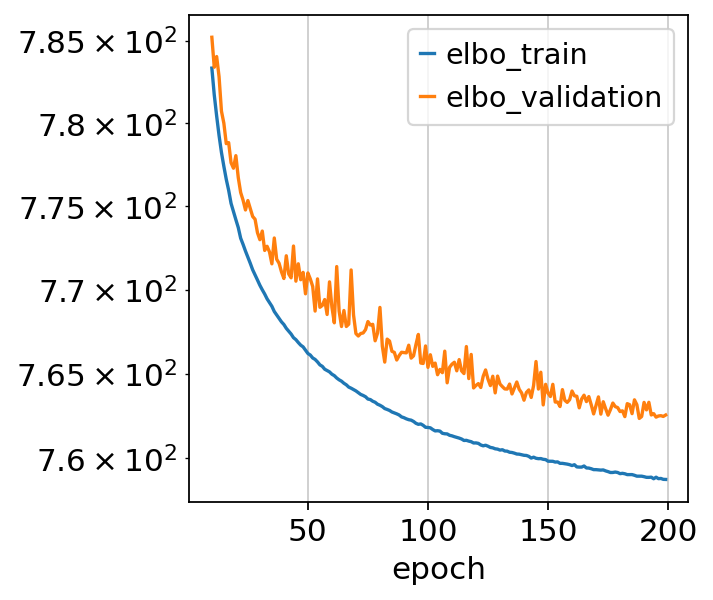

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.32s/it]
L6 IT Car3


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1491
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 200/200 [05:02<00:00,  1.52s/it, v_num=1, train_loss_step=1.48e+3, train_loss_epoch=1.37e+3]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 200/200 [05:02<00:00,  1.51s/it, v_num=1, train_loss_step=1.48e+3, train_loss_epoch=1.37e+3]


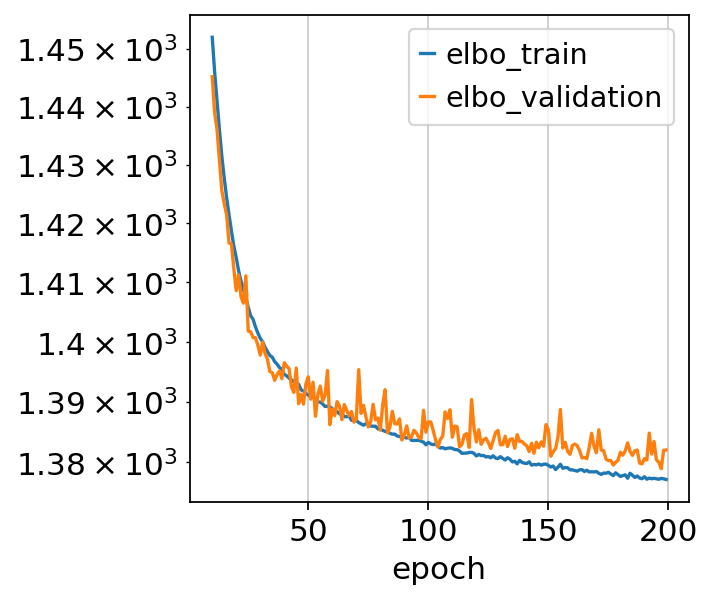

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.41s/it]
Chandelier


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1370
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [01:54<00:00,  1.73it/s, v_num=1, train_loss_step=772, train_loss_epoch=779]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [01:54<00:00,  1.75it/s, v_num=1, train_loss_step=772, train_loss_epoch=779]


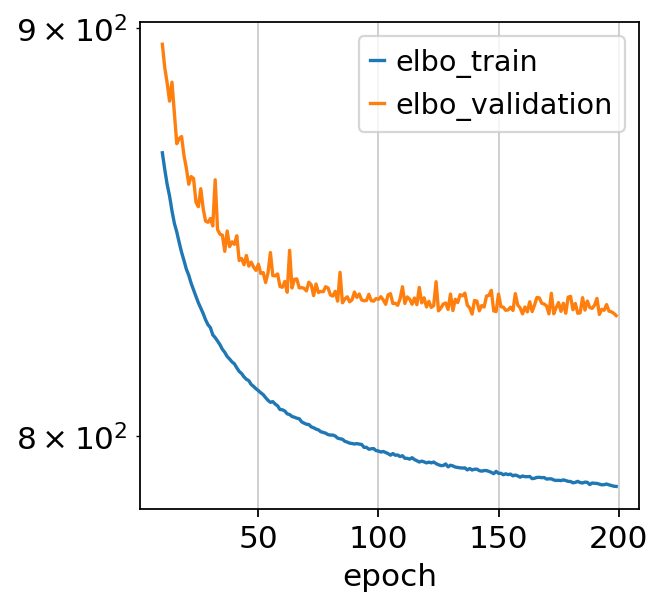

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.18it/s]
Sncg


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1400
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [03:30<00:00,  1.05s/it, v_num=1, train_loss_step=784, train_loss_epoch=753]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [03:30<00:00,  1.05s/it, v_num=1, train_loss_step=784, train_loss_epoch=753]


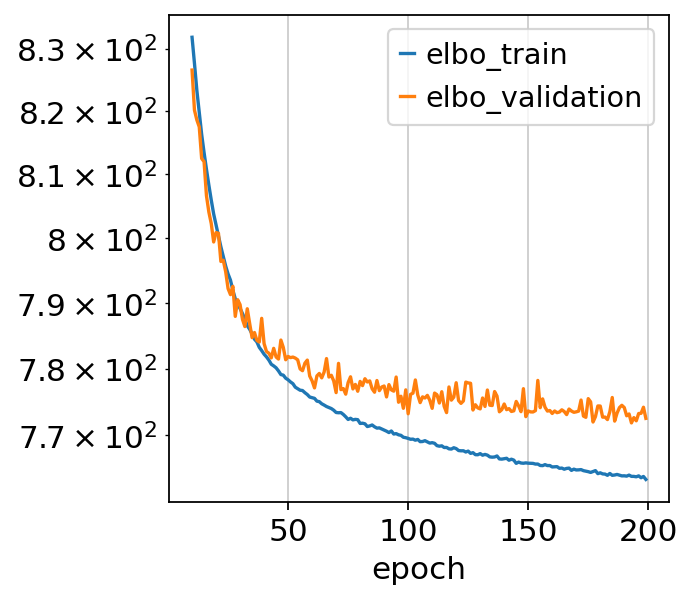

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]
Pax6


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1565
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 200/200 [01:37<00:00,  2.08it/s, v_num=1, train_loss_step=1.01e+3, train_loss_epoch=1.02e+3]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 200/200 [01:37<00:00,  2.05it/s, v_num=1, train_loss_step=1.01e+3, train_loss_epoch=1.02e+3]


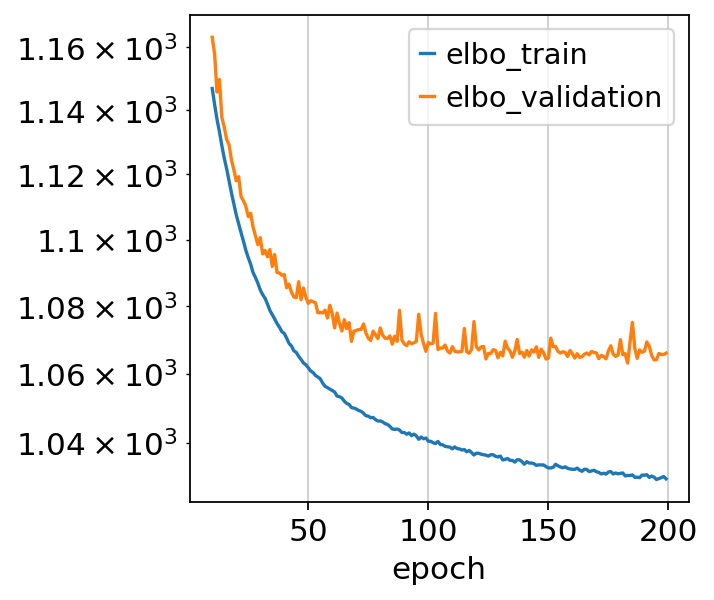

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.11it/s]
Microglia-PVM


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1273
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [07:12<00:00,  2.17s/it, v_num=1, train_loss_step=517, train_loss_epoch=542]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [07:12<00:00,  2.16s/it, v_num=1, train_loss_step=517, train_loss_epoch=542]


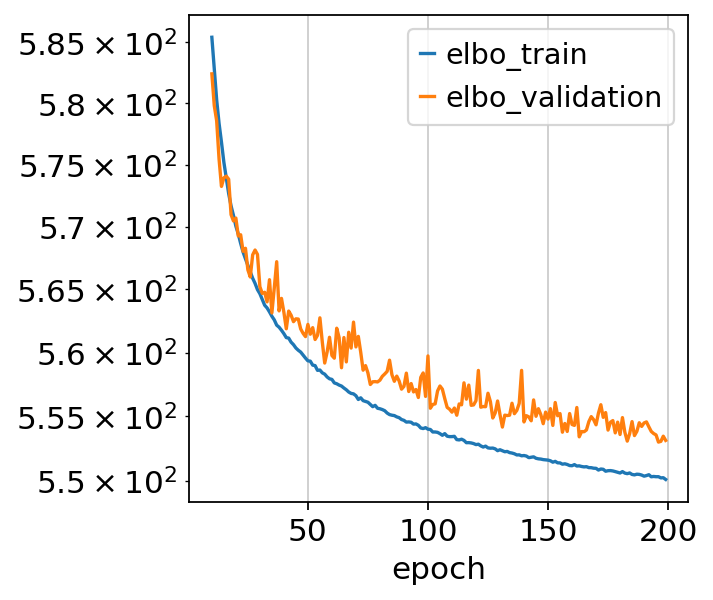

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.42s/it]
L5/6 NP


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1420
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 200/200 [03:41<00:00,  1.09s/it, v_num=1, train_loss_step=1.11e+3, train_loss_epoch=1.06e+3]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 200/200 [03:41<00:00,  1.11s/it, v_num=1, train_loss_step=1.11e+3, train_loss_epoch=1.06e+3]


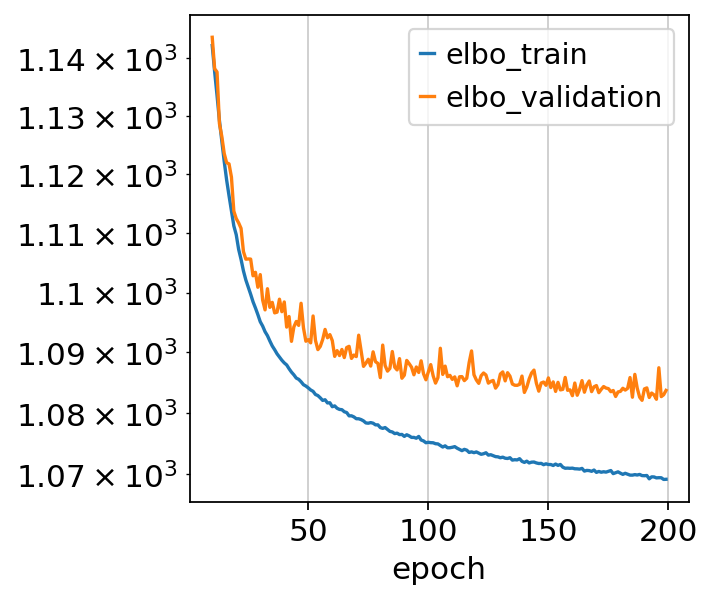

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.12s/it]
L6 CT


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1579
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 200/200 [03:14<00:00,  1.02it/s, v_num=1, train_loss_step=1.45e+3, train_loss_epoch=1.49e+3]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 200/200 [03:14<00:00,  1.03it/s, v_num=1, train_loss_step=1.45e+3, train_loss_epoch=1.49e+3]


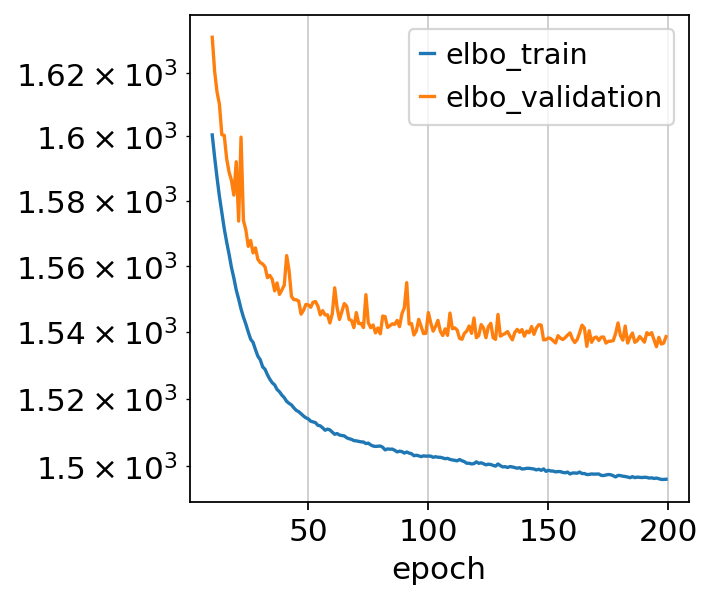

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.20s/it]
L6b


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1558
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 200/200 [02:58<00:00,  1.12it/s, v_num=1, train_loss_step=1.38e+3, train_loss_epoch=1.48e+3]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 200/200 [02:59<00:00,  1.12it/s, v_num=1, train_loss_step=1.38e+3, train_loss_epoch=1.48e+3]


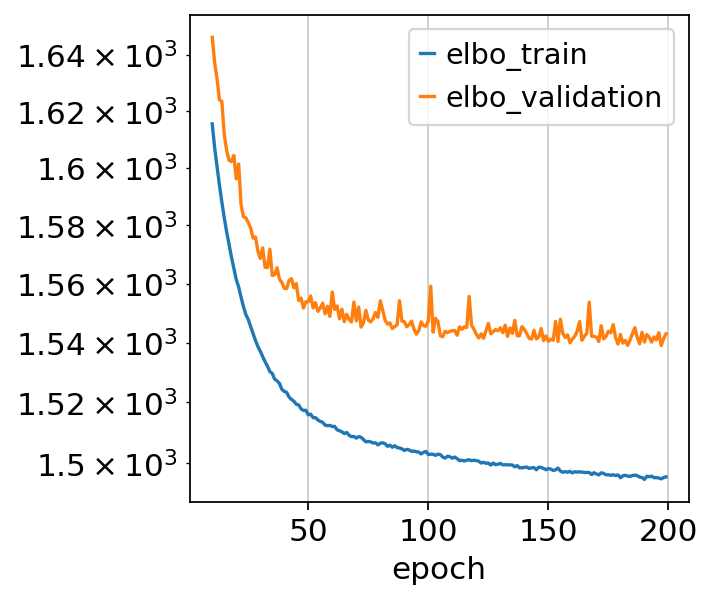

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.15s/it]
Sst Chodl


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/gpfs/home/ajoshi/.local/lib/python3.11/si

Variable Genes:1902
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:18<00:00, 10.79it/s, v_num=1, train_loss_step=1.14e+3, train_loss_epoch=1.22e+3]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:18<00:00, 10.81it/s, v_num=1, train_loss_step=1.14e+3, train_loss_epoch=1.22e+3]


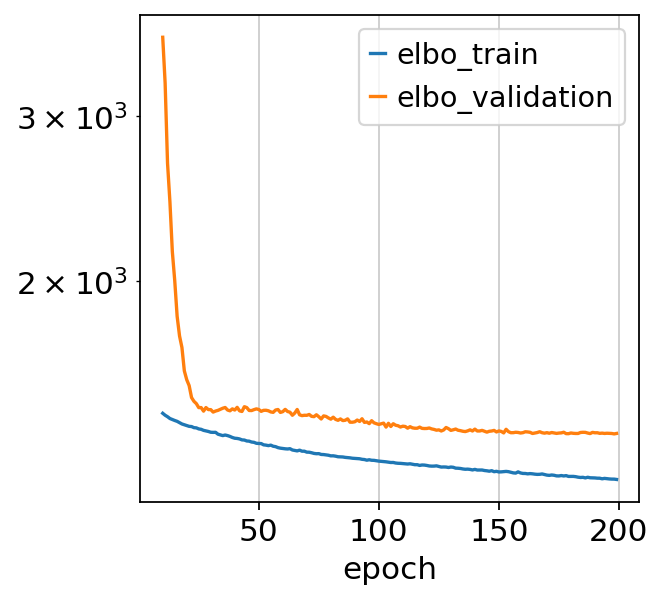

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.20it/s]
L5 ET


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1674
Epoch 200/200: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:34<00:00,  5.84it/s, v_num=1, train_loss_step=1.8e+3, train_loss_epoch=1.76e+3]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:34<00:00,  5.73it/s, v_num=1, train_loss_step=1.8e+3, train_loss_epoch=1.76e+3]


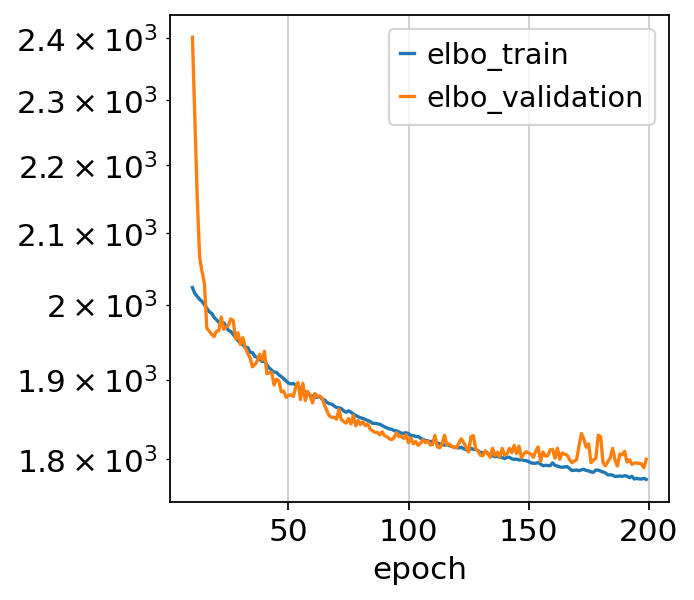

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.27it/s]
Endothelial


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Variable Genes:1567
Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:29<00:00,  6.56it/s, v_num=1, train_loss_step=642, train_loss_epoch=643]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:29<00:00,  6.70it/s, v_num=1, train_loss_step=642, train_loss_epoch=643]


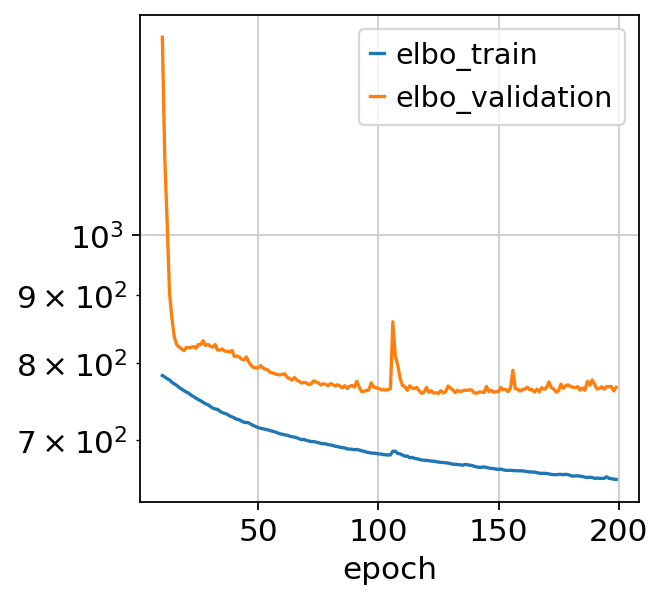

DE...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.40it/s]


In [22]:

##################################################Parameters:##################################
adata_ref_AD = adata[controls+advanced_AD].copy()
results_dir = '../../results/SEA_AD/MTG/DE_genes/scvi/exp7_Ctrl10_lateAD42/'
adata_ref_AD.obs['condition'] = np.where(((adata_ref_AD.obs['Overall AD neuropathological Change']=='Not AD')
                                          |(adata_ref_AD.obs['Overall AD neuropathological Change']=='Reference')
                                         ),'Ctrl','AD')
###############################################################################################

sc.pp.highly_variable_genes(
    adata_ref_AD,
    n_top_genes=10000,
    subset=True
)
scvi.model.SCVI.setup_anndata(adata_ref_AD, layer="UMIs",
                              categorical_covariate_keys=['Gender','Donor ID'],
                              continuous_covariate_keys=["Age at Death"]
                             )
model = scvi.model.SCVI(
    adata_ref_AD, gene_likelihood="nb"
    )  # We use Negative Binomial count likelihoods, following Boyeau et al., 2023.
model.train(
    check_val_every_n_epoch=1,
    max_epochs=300,
    early_stopping=True,
    early_stopping_patience=20,
    early_stopping_monitor="elbo_validation",
    )
train_test_results = model.history["elbo_train"]
train_test_results["elbo_validation"] = model.history["elbo_validation"]
train_test_results.iloc[10:].plot(logy=True)  # exclude first 10 epochs
plt.show()
de_change = model.differential_expression(idx1=adata_ref_AD.obs['condition']=='AD',
                                          idx2=adata_ref_AD.obs['condition']=='Ctrl', weights='uniform')
#de = de_change.loc[de_change['is_de_fdr_0.05']==True,:]
de_change["log10_pscore"] = (-1)*np.log10(de_change["proba_not_de"])
de_change.to_csv(results_dir+'var_genes_'+str(len(adata_ref_AD.var))+'_allcells.tsv',sep='\t')


for cell_type in pd.unique(adata_ref_AD.obs.Subclass):
    print(cell_type)
    cells = list(np.where(adata_ref_AD.obs.Subclass==cell_type)[0])
    adata_cell = adata_ref_AD[cells].copy()
    sc.pp.highly_variable_genes(
        adata_cell,
        #n_top_genes=5000,
        subset=True
        )
    print("Variable Genes:"+str(len(adata_cell.var)))
    scvi.model.SCVI.setup_anndata(adata_cell, layer="UMIs",
                                  categorical_covariate_keys=['Gender','Donor ID'],
                                  continuous_covariate_keys=["Age at Death"]
                                 )
    model = scvi.model.SCVI(
        adata_cell, gene_likelihood="nb")  # We use Negative Binomial count likelihoods, following Boyeau et al., 2023.
    model.train(
        check_val_every_n_epoch=1,
        max_epochs=200,
        early_stopping=True,
        early_stopping_patience=100,
        early_stopping_monitor="elbo_validation",
        batch_size=103,
        plan_kwargs={"lr": 0.001}
        )
    train_test_results = model.history["elbo_train"]
    train_test_results["elbo_validation"] = model.history["elbo_validation"]
    train_test_results.iloc[10:].plot(logy=True)  # exclude first 10 epochs
    plt.show()
    de_change = model.differential_expression(idx1=adata_cell.obs['condition']=='AD',
                                       idx2=adata_cell.obs['condition']=='Ctrl', weights="uniform")
    #de_change = de_change.loc[de['is_de_fdr_0.05']==True,:]
    de_change.loc[:,"log10_pscore"] = (-1)*np.log10(de_change["proba_not_de"])
    cell_type = cell_type.replace('/','')
    cell_type = cell_type.replace(" ","")
    de_change.to_csv(results_dir+'var_genes_'+str(len(adata_cell.var))+'_'+cell_type+'.tsv',sep='\t')
    